<a href="https://colab.research.google.com/github/mrahma15/MyRepos/blob/main/Homework_2_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [16]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [17]:
from torchvision import datasets, transforms
data_path = '/content/drive/MyDrive/Google Colab data'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [18]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [19]:
output_size = 10

In [20]:
import torch.nn as nn


model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                output_size, # <3>
            )
        )

In [21]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [22]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, output_size),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


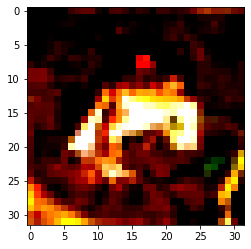

In [23]:
img, _ = cifar10[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [24]:
img_batch = img.view(-1).unsqueeze(0)

In [25]:
out = model(img_batch)
out

tensor([[0.0998, 0.0868, 0.1027, 0.0979, 0.0797, 0.1334, 0.0710, 0.0899, 0.1487,
         0.0902]], grad_fn=<SoftmaxBackward0>)

In [26]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, output_size),
nn.LogSoftmax(dim=1))

In [27]:
loss = nn.NLLLoss()

In [28]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# model = nn.Sequential(
#             nn.Linear(3072, 512),
#             nn.Tanh(),
#             nn.Linear(512, output_size),
#             nn.LogSoftmax(dim=1))

# learning_rate = 1e-2

# optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# loss_fn = nn.NLLLoss()

# n_epochs = 200

# for epoch in range(n_epochs):
#     for img, label in cifar10:
#         out = model(img.view(-1).unsqueeze(0))
#         loss = loss_fn(out, torch.tensor([label]))
                
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, output_size),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.550965
Epoch: 1, Loss: 1.962476
Epoch: 2, Loss: 1.663115
Epoch: 3, Loss: 1.717850
Epoch: 4, Loss: 1.869302
Epoch: 5, Loss: 1.657579
Epoch: 6, Loss: 0.864403
Epoch: 7, Loss: 1.004602
Epoch: 8, Loss: 1.336312
Epoch: 9, Loss: 1.699206
Epoch: 10, Loss: 1.403259
Epoch: 11, Loss: 1.703896
Epoch: 12, Loss: 1.053710
Epoch: 13, Loss: 0.967323
Epoch: 14, Loss: 1.410554
Epoch: 15, Loss: 0.883521
Epoch: 16, Loss: 0.933655
Epoch: 17, Loss: 1.455976
Epoch: 18, Loss: 0.843374
Epoch: 19, Loss: 1.043579
Epoch: 20, Loss: 0.958298
Epoch: 21, Loss: 1.202510
Epoch: 22, Loss: 1.053872
Epoch: 23, Loss: 0.732621
Epoch: 24, Loss: 0.825837
Epoch: 25, Loss: 0.667394
Epoch: 26, Loss: 0.591164
Epoch: 27, Loss: 0.927300
Epoch: 28, Loss: 0.530024
Epoch: 29, Loss: 0.615687
Epoch: 30, Loss: 0.398452
Epoch: 31, Loss: 0.719917
Epoch: 32, Loss: 0.670533
Epoch: 33, Loss: 0.684978
Epoch: 34, Loss: 0.470533
Epoch: 35, Loss: 0.390720
Epoch: 36, Loss: 0.438041
Epoch: 37, Loss: 0.589412
Epoch: 38, Loss: 0.726

In [30]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [31]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.462600


In [32]:
#Problem 2b
#Not yet done

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 256),
            nn.Tanh(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 10))

loss_fn = nn.CrossEntropyLoss()

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 256),
            nn.Tanh(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 10))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.026180
Epoch: 1, Loss: 1.734692
Epoch: 2, Loss: 2.029119
Epoch: 3, Loss: 1.643143
Epoch: 4, Loss: 1.686933
Epoch: 5, Loss: 1.504715
Epoch: 6, Loss: 1.401178
Epoch: 7, Loss: 1.668288
Epoch: 8, Loss: 1.511410
Epoch: 9, Loss: 1.041813
Epoch: 10, Loss: 1.150139
Epoch: 11, Loss: 0.875672
Epoch: 12, Loss: 1.073029
Epoch: 13, Loss: 1.505690
Epoch: 14, Loss: 1.206806
Epoch: 15, Loss: 1.382367
Epoch: 16, Loss: 0.731889
Epoch: 17, Loss: 0.990599
Epoch: 18, Loss: 1.207527
Epoch: 19, Loss: 0.995946
Epoch: 20, Loss: 0.727798
Epoch: 21, Loss: 0.958559
Epoch: 22, Loss: 0.749253
Epoch: 23, Loss: 1.238220
Epoch: 24, Loss: 0.965578
Epoch: 25, Loss: 0.926038
Epoch: 26, Loss: 0.636256
Epoch: 27, Loss: 0.821756
Epoch: 28, Loss: 0.769000
Epoch: 29, Loss: 0.891552
Epoch: 30, Loss: 0.424909
Epoch: 31, Loss: 0.187856
Epoch: 32, Loss: 0.287391
Epoch: 33, Loss: 0.495762
Epoch: 34, Loss: 0.500348
Epoch: 35, Loss: 0.329413
Epoch: 36, Loss: 0.666851
Epoch: 37, Loss: 0.514406
Epoch: 38, Loss: 0.181

In [34]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [35]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.460800
